In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing data from csv

daily = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\daily.csv")
hourly2 = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\hourly2.csv")
dailyst = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\daily_station35.csv")
hourlyst = pd.read_csv("C:\\Users\\arun.bhardwaj\\Desktop\\MyOrdner\\DALab\\hourly_station35.csv")

In [354]:
#hourlyst.head()
#daily.head()
#dailyst.head()
hourly2.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude
0,2013-06-27,1,91,1,Clinton St & Washington Blvd,41.883380,-87.641170
1,2013-06-27,11,17,1,Wood St & Division St,41.903320,-87.672730
2,2013-06-27,11,88,3,Racine Ave & Randolph St,41.884069,-87.656853
3,2013-06-27,12,28,1,Larrabee St & Menomonee St,41.914680,-87.643320
4,2013-06-27,12,85,2,Michigan Ave & Oak St,41.900960,-87.623777


In [371]:
#variable data type
#hourly=hourly2
hourly.dtypes

startday                   object
starthour                   int64
from_station_id             int64
num_trips                   int64
from_station_name          object
from_station_latitude     float64
from_station_longitude    float64
dtype: object

In [369]:
hourly.shape

(4073973, 7)

In [8]:
#any null value?
hourly.isnull().sum()


startday                  0
starthour                 0
from_station_id           0
num_trips                 0
from_station_name         0
from_station_latitude     0
from_station_longitude    0
dtype: int64

In [10]:
#convert startday into date object
hourly.startday =  pd.to_datetime(hourly.startday, errors="coerce")
hourly.dtypes
#hourly.isnull().sum()

startday                  datetime64[ns]
starthour                          int64
from_station_id                    int64
num_trips                          int64
from_station_name                 object
from_station_latitude            float64
from_station_longitude           float64
dtype: object

In [399]:
#feature engineering
#Dervice weekday and weekend
#convert column data into appropriate
dateTimeIndex = pd.DatetimeIndex(hourly['startday'])
hourly["day"] = dateTimeIndex.dayofweek
hourly["month"] = dateTimeIndex.month
hourly['year']= dateTimeIndex.year
hourly["day_name"] = dateTimeIndex.dayofweek
hourly["tripdate"] = dateTimeIndex.day

hourly.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate
0,2013-06-27,1,91,1,Clinton St & Washington Blvd,41.883380,-87.641170,3,6,2013,3,27
1,2013-06-27,11,17,1,Wood St & Division St,41.903320,-87.672730,3,6,2013,3,27
2,2013-06-27,11,88,3,Racine Ave & Randolph St,41.884069,-87.656853,3,6,2013,3,27
3,2013-06-27,12,28,1,Larrabee St & Menomonee St,41.914680,-87.643320,3,6,2013,3,27
4,2013-06-27,12,85,2,Michigan Ave & Oak St,41.900960,-87.623777,3,6,2013,3,27


In [13]:
#define weekday
weekday_name = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_dict = {key: weekday_name[key] for key in range(7)}

def day_of_week(idx):
    return weekday_dict[idx]
hourly.day_name = hourly.day_name.apply(day_of_week)


In [404]:
#apply weekday method. 
hourly.head()  #.drop(['season', 'seasons_name', 'IsHoliday'], axis=1).head()


,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,tripdate
0,2013-06-27,1,91,1,Clinton St & Washington Blvd,41.883380,-87.641170,3,6,2013,Thursday,27
1,2013-06-27,11,17,1,Wood St & Division St,41.903320,-87.672730,3,6,2013,Thursday,27
2,2013-06-27,11,88,3,Racine Ave & Randolph St,41.884069,-87.656853,3,6,2013,Thursday,27
3,2013-06-27,12,28,1,Larrabee St & Menomonee St,41.914680,-87.643320,3,6,2013,Thursday,27
4,2013-06-27,12,85,2,Michigan Ave & Oak St,41.900960,-87.623777,3,6,2013,Thursday,27


In [407]:
count = hourly.groupby("month").count()
count

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,year,day_name,tripdate
month,,,,,,,,,,,
1,170287,170287,170287,170287,170287,170287,170287,170287,170287,170287,170287
2,181418,181418,181418,181418,181418,181418,181418,181418,181418,181418,181418
3,252850,252850,252850,252850,252850,252850,252850,252850,252850,252850,252850
4,331066,331066,331066,331066,331066,331066,331066,331066,331066,331066,331066
5,432515,432515,432515,432515,432515,432515,432515,432515,432515,432515,432515
6,509700,509700,509700,509700,509700,509700,509700,509700,509700,509700,509700
7,429880,429880,429880,429880,429880,429880,429880,429880,429880,429880,429880
8,450388,450388,450388,450388,450388,450388,450388,450388,450388,450388,450388
9,433952,433952,433952,433952,433952,433952,433952,433952,433952,433952,433952


In [319]:
#function to define seasons
def date2season(df):
    #dateTimeIndex = pd.DatetimeIndex(df)
  
    md = df.month * 100 + df.day

    if (md > 320 and md < 621):
        s = 0    #Spring
    elif (md > 620 and md < 923):
        s = 1   #Summer
    elif (md > 922 and md < 1223):
        s = 2   #Fall
    else:
        s = 3   #Winter

        '''
    if hemisphere != 'north':
        if s < 2:
            s += 2 
        else:
            s -= 2
        '''
    return s

d1 = hourly.startday.apply(date2season)
hourly["season"] = d1


In [320]:
#define weekday
seasons = ["Spring", "Summer", "Fall", "Winter"]
season_dict = {key: seasons[key] for key in range(4)}

def season_name(idx):
    return season_dict[idx]

hourly["seasons_name"] = hourly.season.apply(season_name)


In [406]:
hourly.groupby('seasons_name').groups

{'Fall': Int64Index([ 129902,  129903,  129904,  129905,  129906,  129907,  129908,
              129909,  129910,  129911,
             ...
             3482368, 3482369, 3482370, 3482371, 3482372, 3482373, 3482374,
             3482375, 3482376, 3482377],
            dtype='int64', length=959400),
 'Spring': Int64Index([ 356284,  356285,  356286,  356287,  356288,  356289,  356290,
              356291,  356292,  356293,
             ...
             4025434, 4025435, 4025436, 4025437, 4025438, 4025439, 4025440,
             4025441, 4025442, 4025443],
            dtype='int64', length=1190717),
 'Summer': Int64Index([      0,       1,       2,       3,       4,       5,       6,
                   7,       8,       9,
             ...
             4073963, 4073964, 4073965, 4073966, 4073967, 4073968, 4073969,
             4073970, 4073971, 4073972],
            dtype='int64', length=1372040),
 'Winter': Int64Index([ 291688,  291689,  291690,  291691,  291692,  291693,  291694,
     

In [420]:
count = hourly.groupby("seasons_name").count()
count
hourly.head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,season,seasons_name,IsHoliday,tripdate
0,2013-06-27,1,91,1,Clinton St & Washington Blvd,41.883380,-87.641170,3,6,2013,Thursday,1,Summer,0,27
1,2013-06-27,11,17,1,Wood St & Division St,41.903320,-87.672730,3,6,2013,Thursday,1,Summer,0,27
2,2013-06-27,11,88,3,Racine Ave & Randolph St,41.884069,-87.656853,3,6,2013,Thursday,1,Summer,0,27
3,2013-06-27,12,28,1,Larrabee St & Menomonee St,41.914680,-87.643320,3,6,2013,Thursday,1,Summer,0,27
4,2013-06-27,12,85,2,Michigan Ave & Oak St,41.900960,-87.623777,3,6,2013,Thursday,1,Summer,0,27


In [362]:
#Finding hoildays- test
'''
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start='2013-01-01', end='2017-12-31')
    
def USHoliday(startday):
    #daterange = pd.date_range(start='2013-01-01', end='2017-12-31')
    dt = pd.to_datetime(startday)

    i = 0;

    if dt in holidays :
        i = 1
    
    return i

d2 = hourly.startday.apply(USHoliday)
'''


In [114]:
#Finding hoildays
#pip install holidays
#package holidays 0.8.1

import holidays as hh
holidaysArr = []

for x in (2013, 2014, 2015, 2016, 2017):
    for date, name in sorted(hh.US(state='IL', years=x).items()):
        holidaysArr.append(date)

holidays_US = pd.DatetimeIndex(holidaysArr)

def USHolidays(startday):
    dt = pd.to_datetime(startday)
    i = 0
    if dt in holidays_US :
        i = 1    #holiday
    
    return i

h1 = hourly.startday.apply(USHolidays)

In [364]:
hourly["IsHoliday"] = h1
h1[h1==1].count()


117172

In [365]:
hourly.loc[hourly.IsHoliday == 1, :].head()

,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,season,seasons_name,IsHoliday,tripdate
3507,2013-07-04,0,14,2,Morgan St & 18th St,41.858086,-87.651073,3,7,2013,Thursday,1,Summer,1,4
3508,2013-07-04,0,17,3,Wood St & Division St,41.903320,-87.672730,3,7,2013,Thursday,1,Summer,1,4
3509,2013-07-04,0,24,1,Fairbanks Ct & Grand Ave,41.891860,-87.620620,3,7,2013,Thursday,1,Summer,1,4
3510,2013-07-04,0,25,1,Michigan Ave & Pearson St,41.897660,-87.623510,3,7,2013,Thursday,1,Summer,1,4
3511,2013-07-04,0,26,3,McClurg Ct & Illinois St,41.891020,-87.617300,3,7,2013,Thursday,1,Summer,1,4


In [ ]:
'''
groupby on different column
'''

#t2 = hourly.groupby(['seasons_name', 'startday'])

#lvl0 = hourly.seasons_name.values
#lvl1 = hourly.startday.values
#midf = pd.MultiIndex.from_arrays([lvl0, lvl1], names=['level 0', 'level 1'])

#t3 = hourly['seasons_name', 'startday', 'num_trips'].groupby([pd.Grouper(level='seasons_name'), 'startday']).sum()

t4 = hourly.groupby(['seasons_name', 'startday']).num_trips.sum().to_frame()

t4.sort_index(level='startday')

#df_fall = pd.DataFrame(t4.loc['Fall'])
#df_fall = df_fall.reset_index(level='startday')
#df_fall.head()

df_allSeasons = t4.sort_index(level='startday').reset_index(level=['seasons_name', 'startday'])
#df_allSeasons.head()



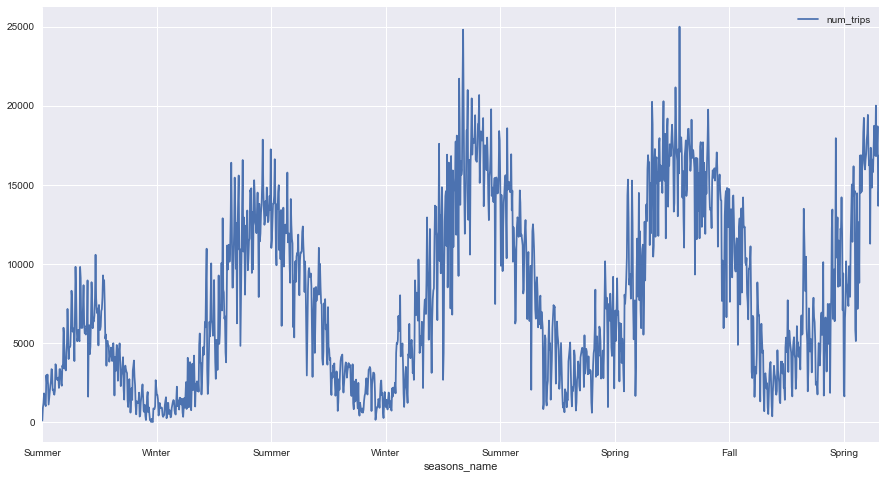

In [322]:
import matplotlib.pyplot as plt
#plt.plot(df_allSeasons['startday'], df_allSeasons['num_trips'], figsize=(15,4))

#df_allSeasons.plot(x=df_allSeasons.startday, figsize=(15,8))
df_allSeasons.plot(x=df_allSeasons.seasons_name, figsize=(15,8))


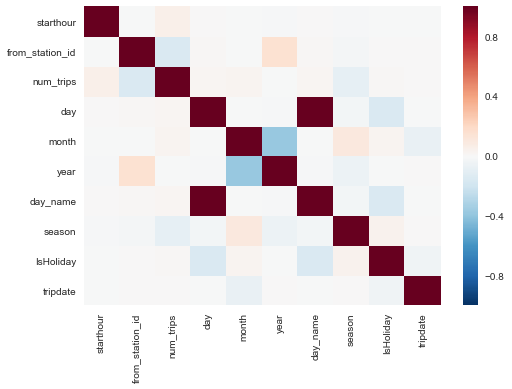

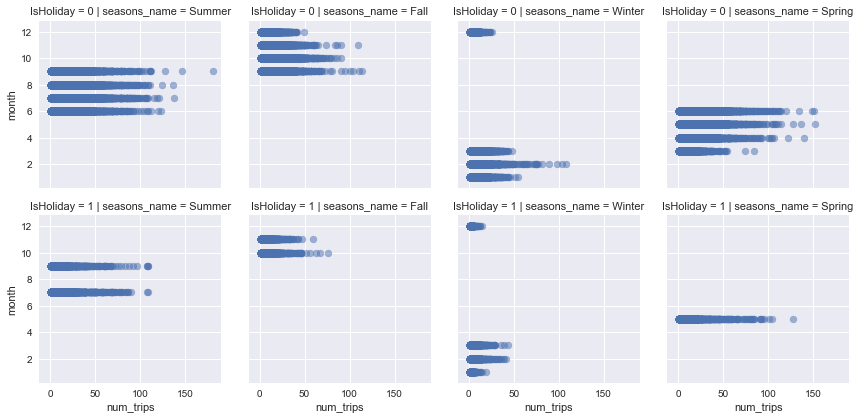

In [367]:
import seaborn as sns

X = hourly.drop(['startday',  'from_station_longitude', 'from_station_name', 'seasons_name', 'from_station_latitude'], axis=1)

sns.heatmap(X.corr())

grid = sns.FacetGrid(hourly, col = 'seasons_name', row = 'IsHoliday')
grid.map(plt.scatter, 'num_trips', 'month', alpha = 0.5)
grid.add_legend();


In [412]:
X.corr()

,starthour,from_station_id,num_trips,day,month,year,day_name,season,IsHoliday,tripdate
starthour,1.000000,-0.001914,0.057574,0.004013,-0.002434,-0.011454,0.004013,-0.015618,-0.000840,-0.002841
from_station_id,-0.001914,1.000000,-0.150098,0.012407,-0.002842,0.151003,0.012407,-0.022013,0.001495,0.001112
num_trips,0.057574,-0.150098,1.000000,0.021192,0.028747,-0.003039,0.021192,-0.092696,0.009877,0.000733
day,0.004013,0.012407,0.021192,1.000000,-0.000912,-0.014444,1.000000,-0.023953,-0.151943,-0.002101
month,-0.002434,-0.002842,0.028747,-0.000912,1.000000,-0.376634,-0.000912,0.106105,0.024532,-0.077246
year,-0.011454,0.151003,-0.003039,-0.014444,-0.376634,1.000000,-0.014444,-0.055041,-0.007036,0.004473
day_name,0.004013,0.012407,0.021192,1.000000,-0.000912,-0.014444,1.000000,-0.023953,-0.151943,-0.002101
season,-0.015618,-0.022013,-0.092696,-0.023953,0.106105,-0.055041,-0.023953,1.000000,0.043517,0.003343
IsHoliday,-0.000840,0.001495,0.009877,-0.151943,0.024532,-0.007036,-0.151943,0.043517,1.000000,-0.039346
tripdate,-0.002841,0.001112,0.000733,-0.002101,-0.077246,0.004473,-0.002101,0.003343,-0.039346,1.000000


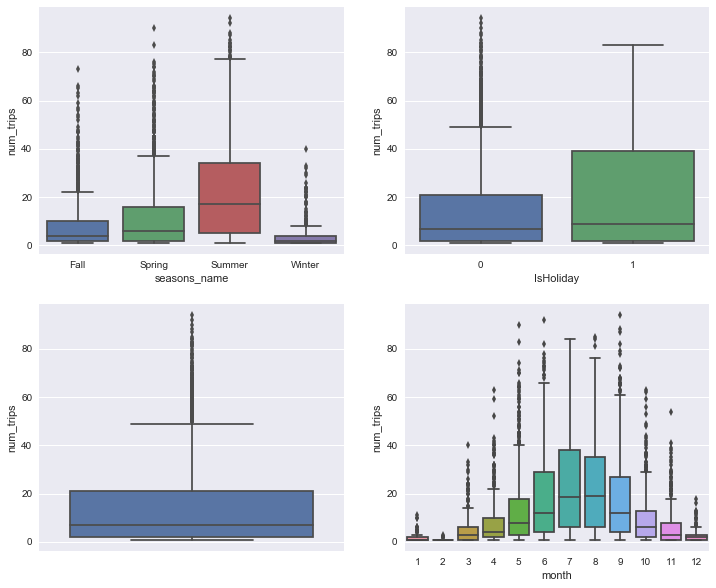

In [419]:
#at from_station_id=35
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12, 10)
sns.boxplot(data=hourly[(hourly.from_station_id==35) & (hourly.year == 2015)],y="num_trips", x="seasons_name",orient="v",ax=axes[0][0])
sns.boxplot(data=hourly[(hourly.from_station_id==35) & (hourly.year == 2015)],y="num_trips", x="IsHoliday",orient="v",ax=axes[0][1])
sns.boxplot(data=hourly[(hourly.from_station_id==35) & (hourly.year == 2015)],y="num_trips", orient="v",ax=axes[1][0])
sns.boxplot(data=hourly[(hourly.from_station_id==35) & (hourly.year == 2015)],y="num_trips", x="month",orient="v",ax=axes[1][1])

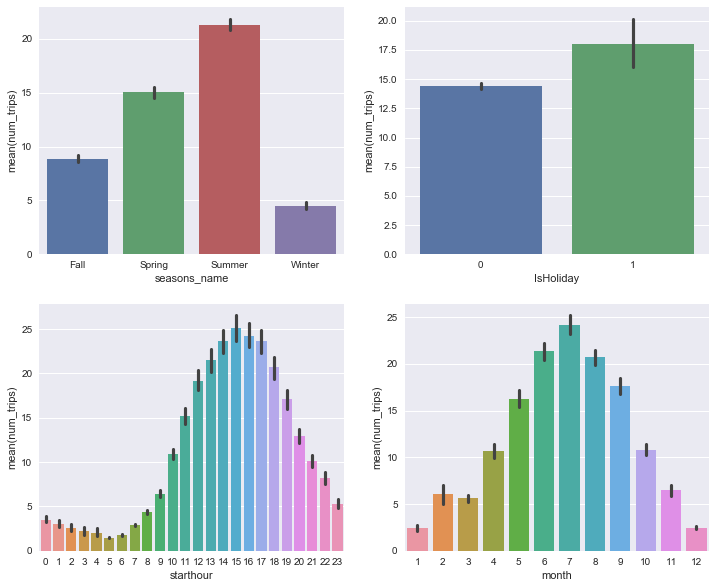

In [397]:
#bar chart
#at from_station_id=35
fig1, axes1 = plt.subplots(nrows=2, ncols=2)
fig1.set_size_inches(12, 10)

sns.barplot(data=hourly[hourly.from_station_id==35],y="num_trips", x="seasons_name",orient="v",ax=axes1[0][0])
sns.barplot(data=hourly[hourly.from_station_id==35],y="num_trips", x="IsHoliday",orient="v",ax=axes1[0][1])
sns.barplot(data=hourly[hourly.from_station_id==35],y="num_trips", x="starthour", orient="v",ax=axes1[1][0])
sns.barplot(data=hourly[hourly.from_station_id==35],y="num_trips", x="month",orient="v",ax=axes1[1][1])


In [411]:
#setting baseline, last 10 day data
#root mean square-testing
import numpy as np
from sklearn.metrics import mean_squared_error

y = df_allSeasons["num_trips"].tail(10)

#y_pred = y +1;
#y = df_allSeasons.tail(10)
y

mse = np.mean((y - y_pred)**2)
mse

#mean_squared_error(y, y_pred)

1.0

In [254]:
print('hello')

hello


In [330]:
import forecastio
import datetime
api_key = "86ffa6330d3a914ca6c5d64d5d2eaaf0"

def forecastWeather(lat, lng, d, m, y, time):
    #temp2 = pd.to_datetime('2017-06-11 7:00:00')
    temp2 = datetime.datetime(y, m, d, time, 0, 0)
    forecast = forecastio.load_forecast(api_key, lat, lng, time=temp2)

    #dt = pd.to_datetime(startday)
    byHour = forecast.hourly()
    #forecast = forecastio.load_forecast(api_key, lat, lng, time=current_time)
    return byHour.icon

d3 = hourly.head(100)
d3['weather'] = d3.apply(lambda row: forecastWeather(row['from_station_latitude'],
      row['from_station_longitude'],
         row['tripdate'],
            row['month'],
               row['year'],
                  row['starthour']), axis=1)
d3.tail(10)

C:\_Apps\Anaconda\lib\site-packages\ipykernel\__main__.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,startday,starthour,from_station_id,num_trips,from_station_name,from_station_latitude,from_station_longitude,day,month,year,day_name,season,seasons_name,IsHoliday,tripdate,weather
90,2013-06-28,7,32,1,Racine Ave & Congress Pkwy,41.874640,-87.657030,4,6,2013,Friday,1,Summer,0,28,rain
91,2013-06-28,7,34,3,Cannon Dr & Fullerton Ave,41.926756,-87.634429,4,6,2013,Friday,1,Summer,0,28,rain
92,2013-06-28,7,36,2,Franklin St & Jackson Blvd,41.877708,-87.635321,4,6,2013,Friday,1,Summer,0,28,rain
93,2013-06-28,7,48,1,Larrabee St & Kingsbury St,41.897764,-87.642884,4,6,2013,Friday,1,Summer,0,28,rain
94,2013-06-28,7,51,1,Clark St & Randolph St,41.884576,-87.631890,4,6,2013,Friday,1,Summer,0,28,rain
95,2013-06-28,7,52,1,Michigan Ave & Lake St,41.886024,-87.624117,4,6,2013,Friday,1,Summer,0,28,rain
96,2013-06-28,7,54,1,Ogden Ave & Chicago Ave,41.896362,-87.654061,4,6,2013,Friday,1,Summer,0,28,rain
97,2013-06-28,7,59,1,Wabash Ave & Roosevelt Rd,41.867227,-87.625961,4,6,2013,Friday,1,Summer,0,28,rain
98,2013-06-28,7,66,3,Clinton St & Lake St,41.885637,-87.641823,4,6,2013,Friday,1,Summer,0,28,rain
99,2013-06-28,7,67,2,Sheffield Ave & Fullerton Ave,41.925602,-87.653708,4,6,2013,Friday,1,Summer,0,28,rain


In [343]:
#testing on weather
temp2 = pd.to_datetime('2013-06-28 7:00:00')
temp2
lat = 41.874640
lng = -87.657030
forecast = forecastio.load_forecast(api_key, lat, lng, time=temp2)
byHour = forecast.hourly()
print(byHour.data[7].temperature)
print(byHour.icon)

71.05
rain


In [ ]:
#dropping unsued column


In [408]:
#defining category
tempData = hourly

categoricalVariables = ["from_station_id","from_station_name","month", "year", "season", "seasons_name", "IsHoliday"]
for var in categoricalVariables:
    tempData[var] = tempData[var].astype("category")

tempData.dtypes

startday                  datetime64[ns]
starthour                          int64
from_station_id                 category
num_trips                          int64
from_station_name               category
from_station_latitude            float64
from_station_longitude           float64
day                                int32
month                           category
year                            category
day_name                          object
season                          category
seasons_name                    category
IsHoliday                       category
tripdate                           int32
dtype: object